In [229]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.api import OLS

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 15)

In [2]:
# Load the data
all_data = pd.read_csv('MSF_1996_2023.csv', low_memory=False)

# Convert date to datetime
all_data['date'] = pd.to_datetime(all_data['date'])

# Sort the dataframe by date and PERMNO
all_data

,PERMNO,date,SHRCD,SICCD,TICKER,COMNAM,PERMCO,CUSIP,BIDLO,ASKHI,PRC,VOL,RET,BID,ASK,SHROUT,RETX,vwretd
0,10001,1996-01-31,11,4920,EWST,ENERGY WEST INC,7953,36720410,8.75000,9.50000,-9.12500,168.0,-0.026667,8.75000,9.50000,2281.0,-0.026667,0.028121
1,10001,1996-02-29,11,4920,EWST,ENERGY WEST INC,7953,36720410,8.75000,9.50000,9.25000,524.0,0.013699,9.25000,9.75000,2281.0,0.013699,0.016353
2,10001,1996-03-29,11,4920,EWST,ENERGY WEST INC,7953,36720410,9.25000,9.75000,9.48438,283.0,0.036149,9.00000,9.50000,2309.0,0.025338,0.010914
3,10001,1996-04-30,11,4920,EWST,ENERGY WEST INC,7953,36720410,8.62500,9.37500,-8.81250,327.0,-0.070840,8.62500,9.00000,2309.0,-0.070840,0.025560
4,10001,1996-05-31,11,4920,EWST,ENERGY WEST INC,7953,36720410,8.62500,9.00000,8.62500,103.0,-0.021277,8.62500,9.00000,2309.0,-0.021277,0.026810
5,10001,1996-06-28,11,4920,EWST,ENERGY WEST INC,7953,36720410,8.00000,9.00000,8.00000,338.0,-0.060290,8.00000,8.25000,2321.0,-0.072464,-0.008289
6,10001,1996-07-31,11,4920,EWST,ENERGY WEST INC,7953,36720410,8.00000,8.37500,-8.18750,207.0,0.023438,8.00000,8.37500,2321.0,0.023438,-0.053851
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1636556,93436,2023-06-30,11,9999,TSLA,TESLA INC,53453,88160R10,207.52000,274.45001,261.76999,34409322.0,0.283627,261.67999,261.73001,3174000.0,0.283627,0.066183
1636557,93436,2023-07-31,11,9999,TSLA,TESLA INC,53453,88160R10,255.71001,293.34000,267.42999,23934292.0,0.021622,267.48999,267.51999,3173994.0,0.021622,0.035624


In [3]:
all_data = all_data.sort_values(['date', 'PERMNO'])

In [5]:
def map_industry(siccd):
    if 1 <= siccd <= 999:
        return "Agriculture, Forestry and Fishing"
    elif 1000 <= siccd <= 1499:
        return "Mining"
    elif 1500 <= siccd <= 1799:
        return "Construction"
    elif 2000 <= siccd <= 3999:
        return "Manufacturing"
    elif 4000 <= siccd <= 4999:
        return "Transportation and other Utilities"
    elif 5000 <= siccd <= 5199:
        return "Wholesale Trade"
    elif 5200 <= siccd <= 5999:
        return "Retail Trade"
    elif 6000 <= siccd <= 6799:
        return "Finance, Insurance and Real Estate"
    elif 7000 <= siccd <= 8999:
        return "Services"
    else:
        return "Public Administration"

In [6]:
industry_labels = [
    "Agriculture, Forestry and Fishing",
    "Mining",
    "Construction",
    "Manufacturing",
    "Transportation and other Utilities",
    "Wholesale Trade",
    "Retail Trade",
    "Finance, Insurance and Real Estate",
    "Services",
    "Public Administration"
]

In [7]:
all_data['SICCDINT'] = pd.to_numeric(all_data['SICCD'], errors='coerce')
all_data = all_data.dropna(subset=['SICCDINT'])
all_data['industry'] = all_data['SICCDINT'].apply(map_industry)

/Users/namankedia/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
def sample_unique_companies(group):
    unique_companies = group.drop_duplicates(subset='PERMNO')
    if len(unique_companies) > 10:
        return unique_companies.sample(10)
    else:
        return unique_companies

def select_sample(df, year):
    year_data = df[df['date'].dt.year == year]
    return year_data.groupby('industry').apply(sample_unique_companies).reset_index(drop=True)

In [9]:
all_data['RET'] = pd.to_numeric(all_data['RET'], errors='coerce')
all_data['vwretd'] = pd.to_numeric(all_data['vwretd'], errors='coerce')
all_data = all_data.dropna(subset=['RET', 'vwretd'])

/Users/namankedia/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/namankedia/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [10]:
samples = [select_sample(all_data, year) for year in range(1996, 2024)]

In [12]:
final_df = all_data.copy(deep=True)

In [14]:
def estimate_beta(returns, market_returns):
    X = sm.add_constant(market_returns)
    model = OLS(returns, X).fit()
    beta = model.params[1]  # Beta is the coefficient of market_returns
    alpha = model.params[0]  # Alpha is the intercept
    residuals = model.resid
    residual_var = residuals.var()
    var_market_returns = market_returns.var()
    var_returns = returns.var()
    
    return beta, alpha, residual_var, var_market_returns, var_returns

In [15]:
beta_df = pd.DataFrame(columns=['PERMCO', 'Year', 'Window', 'Beta', 'Alpha', 'Residual Var', 'Market Var', 'Stock Var', 'Industry'])

In [16]:
def calculate_betas_for_sample(full_data, sample_firms, beta_df1, year, window):
    sample_permnos = sample_firms['PERMNO'].unique()
    full_data = full_data.sort_values(['PERMNO', 'date'])
    data_for_beta = full_data[full_data['PERMNO'].isin(sample_permnos)]
    for firm in sample_permnos:
        firm_data = data_for_beta[(data_for_beta['PERMNO'] == firm) & (data_for_beta['date'].dt.year <= year) & (data_for_beta['date'].dt.year > (year - (window)/12))]
        if(firm_data['RET'].shape[0] < 10):
            continue
        beta, alpha, residual_var, var_market_returns, var_returns = estimate_beta(firm_data['RET'], firm_data['vwretd'])
        industry_value = firm_data['industry'].iloc[0] 

        new_row = {
            'PERMCO': firm,
            'Year': year,
            'Window': window,
            'Beta': beta,
            'Alpha': alpha,
            'Residual Var': residual_var,
            'Market Var': var_market_returns,
            'Stock Var': var_returns,
            'Industry': industry_value
        }

        beta_df1 = beta_df1.append(new_row, ignore_index=True)
    return beta_df1

In [17]:
# Calculate betas for each sample
year = 1996
beta_df = pd.DataFrame(columns=['PERMCO', 'Year', 'Window', 'Beta', 'Alpha', 'Residual Var', 'Market Var', 'Stock Var', 'Industry'])
for sample in samples:
    beta_df = calculate_betas_for_sample(final_df, sample, beta_df, year , 12)
    beta_df = calculate_betas_for_sample(final_df, sample, beta_df, year , 24)
    beta_df = calculate_betas_for_sample(final_df, sample, beta_df, year , 36)
    year = year + 1

/Users/namankedia/anaconda3/envs/tensorflow/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [19]:
# sample_permnos = samples[0]['PERMNO'].unique()
# final_df = final_df.sort_values(['PERMNO', 'date'])
# data_for_beta = final_df[final_df['PERMNO'].isin(sample_permnos)]
# data_for_beta['PERMNO'].unique()


import pandas as pd
from scipy.stats import skew, kurtosis

def descriptive_stats(group):
    return pd.Series({
        'N': group.count(),
        'mean': group.mean(),
        'std_dev': group.std(),
        'min': group.min(),
        'max': group.max(),
        '1%': group.quantile(0.01),
        '5%': group.quantile(0.05),
        '25%': group.quantile(0.25),
        '50%': group.median(),
        '75%': group.quantile(0.75),
        '95%': group.quantile(0.95),
        '99%': group.quantile(0.99),
        'skewness': skew(group, bias=False),
        'kurtosis': kurtosis(group, bias=False)
    })

In [27]:
# Group by industry and apply the descriptive_stats function to 'Beta' column
result = beta_df.groupby('Industry')['Beta'].apply(descriptive_stats).unstack()

In [28]:
year_wise_result = beta_df.groupby(['Industry', 'Year'])['Beta'].apply(descriptive_stats).unstack()

<h1>
    Descriptive Stats Industry Wise
</h1>

In [29]:
from IPython.display import display, HTML

# Convert the DataFrame to an HTML table with scrollable output
display(HTML(result.to_html(max_rows=500, max_cols=20)))

,N,mean,std_dev,min,max,1%,5%,25%,50%,75%,95%,99%,skewness,kurtosis
Industry,,,,,,,,,,,,,,
"Agriculture, Forestry and Fishing",695.0,0.802413,1.093988,-6.340539,4.853420,-2.011606,-0.659551,0.318181,0.775567,1.264994,2.676616,3.857353,-0.781928,7.792098
Construction,785.0,1.412095,1.060189,-6.298582,6.348079,-1.530381,-0.000469,0.880853,1.363898,1.878036,3.232404,4.361862,-0.153295,5.440288
"Finance, Insurance and Real Estate",838.0,0.832577,0.896110,-2.155330,8.033170,-0.849052,-0.328523,0.234262,0.763670,1.254237,2.227388,3.512253,1.650066,8.385122
Manufacturing,893.0,1.299777,1.163942,-7.945742,8.518016,-0.970511,-0.133570,0.665311,1.190094,1.756273,3.130765,5.691050,0.956319,9.752799
Mining,766.0,1.561231,1.964255,-11.293700,26.881343,-1.546954,-0.293285,0.666978,1.340221,2.143644,3.926675,8.140320,4.811489,55.766030
Public Administration,463.0,1.218934,1.315289,-1.972339,7.905778,-1.814591,-0.970550,0.459302,1.207895,1.893913,3.550926,4.912395,0.515997,1.937478
Retail Trade,797.0,1.151797,1.175780,-7.126285,8.871042,-1.319418,-0.247346,0.518202,1.024757,1.591343,3.054757,5.064336,0.573120,8.713134
Services,783.0,1.334899,1.368723,-6.029365,6.439849,-2.866116,-0.388840,0.649641,1.197195,1.965237,3.525395,5.064857,-0.311076,4.292775
Transportation and other Utilities,797.0,1.026799,1.209378,-7.285664,8.672091,-1.042687,-0.273803,0.354405,0.851133,1.424599,3.031627,5.382219,1.531028,11.360727


<h1>
    Descriptive Stats Industry-Year Wise
</h1>

In [30]:
display(HTML(year_wise_result.to_html(max_rows=500, max_cols=20)))

<h1>
    Mean Betas Graph across industries
</h1>

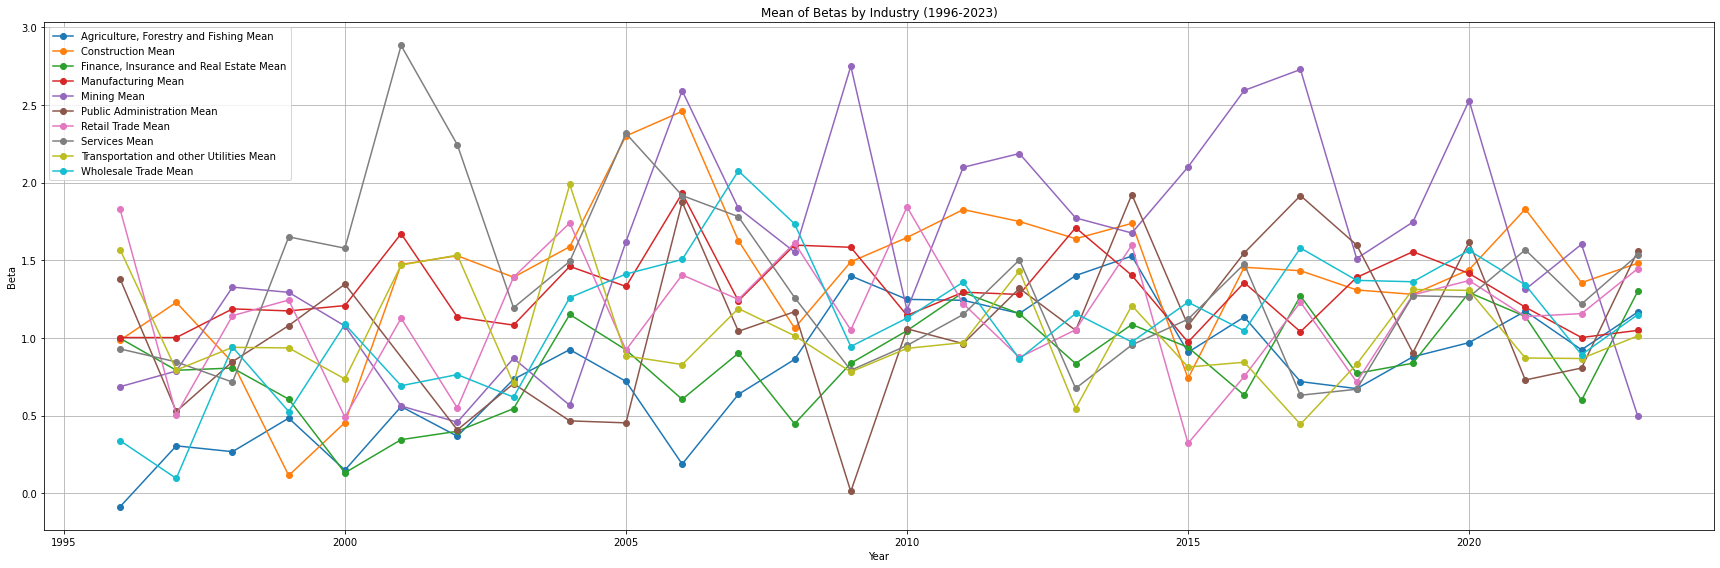

In [52]:
import matplotlib.pyplot as plt
# Group by 'industry' and 'year', then compute mean and standard deviation
agg_stats = beta_df.groupby(['Industry', 'Year'])['Beta'].agg(['mean', 'std']).reset_index()

# Rename columns for clarity
agg_stats.columns = ['Industry', 'Year', 'mean_beta', 'std_beta']

# Set up the plotting area
plt.figure(figsize=(24, 8))

# Get unique industries
industries = agg_stats['Industry'].unique()

# Plot each industry's mean and standard deviation over time
for industry in industries:
    industry_data = agg_stats[agg_stats['Industry'] == industry]
    
    plt.plot(industry_data['Year'], industry_data['mean_beta'], label=f'{industry} Mean', linestyle='-', marker='o')
#     plt.fill_between(industry_data['Year'],
#                      industry_data['mean_beta'] - industry_data['std_beta'],
#                      industry_data['mean_beta'] + industry_data['std_beta'],
#                      alpha=0.3)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Beta')
plt.title('Mean of Betas by Industry (1996-2023)')
plt.legend(loc='best')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


In [53]:
# code for plotting here
import plotly.express as px
def plotTimeSeries(df, label):
#     try:
        fig = px.line(df, x=df.index, y = df['mean_beta'],  title="Plot for " + label)
        fig.update_xaxes(nticks=30)
        fig.update_layout(
            height=600,
            width=800
        )
        fig.show()
#     except:
#         print("Error plotting " + label)

<h1>
    Std Deviation of Betas Across industries
</h1>

In [56]:
import plotly.graph_objects as go

fig = go.Figure()

for industry in industries:
    industry_data = agg_stats[agg_stats['Industry'] == industry]
    fig.add_trace(go.Scatter(
        x=industry_data['Year'],
        y=industry_data['std_beta'],
        mode='lines+markers',
        name=f'{industry} Std',
        line=dict(width=1),
        marker=dict(size=3)
    ))

fig.update_layout(
    title='Standard Deviation of Betas by Industry (1996-2023)',
    xaxis_title='Year',
    yaxis_title='Beta',
    legend_title='Industry',
    width=1200,
)
fig.update_xaxes(nticks=28)

# Show the plot
fig.show()

<h4>

**Key observations and trends::** 

- Volatility: Most industries show significant volatility in their beta values over time, with frequent ups and downs rather than steady trends
- Range: Beta values generally range between 0.5 and 2.5 for most industries across the period, especially after 2004
- Significant drop in Beta seen in Finance and Banking industry in 2008 likely owing to the financial crisis.
- High Beta is observed in Construction and Mining sectors. THis likely means that these industries tend to perform better than the market overall as they are a more stable business. 
- Mining shows huge spike in 2008 and 2020 both in Beta and Volatility of Beta. This means irregular impact in the markets for the mining industry during the financial crisis and COVID.
-  In the most recent years during 2017 and 2021, there's increased volatility across many sectors, possibly reflecting the economic uncertainties related to the COVID-19 pandemic. Reason for 2017 is still inconclusive.
</h4>

In [57]:
beta_df['IVOL'] = np.sqrt(beta_df['Residual Var'])
beta_df['SVOl'] = np.sqrt((beta_df['Beta'] ** 2) * beta_df['Market Var'])
beta_df['TVOL'] = beta_df['SVOl'] + beta_df['IVOL']

In [102]:
agg_vol_stats = beta_df.groupby(['Industry', 'Year'])['TVOL','SVOl','IVOL'].agg(['mean']).reset_index()
agg_vol_stats.columns = ['Industry', 'Year', 'TVOL', 'SVOL', 'IVOL']

                              Industry  Year      TVOL      SVOL      IVOL
0    Agriculture, Forestry and Fishing  1996  0.168548  0.026117  0.142431
1    Agriculture, Forestry and Fishing  1997  0.201411  0.059748  0.141664
2    Agriculture, Forestry and Fishing  1998  0.199368  0.068089  0.131279
3    Agriculture, Forestry and Fishing  1999  0.150579  0.034916  0.115663
4    Agriculture, Forestry and Fishing  2000  0.216414  0.036872  0.179542
5    Agriculture, Forestry and Fishing  2001  0.240993  0.035994  0.204999
6    Agriculture, Forestry and Fishing  2002  0.178523  0.030147  0.148376
..                                 ...   ...       ...       ...       ...
272                    Wholesale Trade  2017  0.130319  0.033788  0.096531
273                    Wholesale Trade  2018  0.139005  0.051117  0.087887
274                    Wholesale Trade  2019  0.170236  0.052815  0.117421
275                    Wholesale Trade  2020  0.207423  0.104088  0.103335
276                    Wh

In [105]:
import plotly.graph_objects as go

def plotVolatility(agg_stats, industries):
    # Loop through each industry to create a separate plot
    for industry in industries:
        # Filter data for the current industry
        industry_data = agg_stats[agg_stats['Industry'] == industry]
        
        # Ensure 'Year' is numeric and sorted
#         industry_data['Year'] = pd.to_numeric(industry_data['Year'], errors='coerce')
        industry_data = industry_data.sort_values(by='Year')

        # Initialize a figure
        fig = go.Figure()

        # Plot Total Volatility (TVOL)
        fig.add_trace(go.Scatter(
            x=industry_data['Year'],
            y=industry_data['TVOL'],
            mode='lines+markers',
            name=f'{industry} TVOL',
            line=dict(width=1),
            marker=dict(size=4)
        ))

        # Plot Systematic Volatility (SVOL)
        fig.add_trace(go.Scatter(
            x=industry_data['Year'],
            y=industry_data['SVOL'],
            mode='lines+markers',
            name=f'{industry} SVOL',
            line=dict(width=1),
            marker=dict(size=4)
        ))

        # Plot Idiosyncratic Volatility (IVOL)
        fig.add_trace(go.Scatter(
            x=industry_data['Year'],
            y=industry_data['IVOL'],
            mode='lines+markers',
            name=f'{industry} IVOL',
            line=dict(width=1),
            marker=dict(size=4)
        ))

        # Update layout with title and axis labels
        fig.update_layout(
            title=f'Volatility Metrics for {industry} (1996-2023)',
            xaxis_title='Year',
            yaxis_title='Volatility',
            legend_title='Volatility Type',
            xaxis=dict(tickmode='linear', tick0=1996, dtick=1),  # Ensure yearly ticks on x-axis
            width=1000,  # Increase figure width for better readability
            height=600
        )
        
        # Display the figure
        fig.show()

# Example: Assuming you have the 'agg_stats' DataFrame and a list of industries
# plotVolatility(agg_stats, industries)


<h1>
    Volatility Plots Industry wise Graph for TVOL,IVOL,SVOL
</h1>

In [106]:
plotVolatility(agg_vol_stats, industries)

<h2>

### Observation

- IVOL major contributor to the TVOL. Most volatility comes from residual volatility of linear regression. This makes sense and sustematic market volatility is less as overall market is more stable than individual stocks. 
- TVOL, IVOL and SVOL  are dependent and correlated. They all follow the same distribution of trends ie it is not seen that the volatility trends differ from one another (ie. not a single graph with unnatural trends like SVOL increases but TVOL decreases etc.). 
- Services industry seen to have relativele stable volatility since 2005
- Highest Volatility seen in mining
- Sharp spikes in TVOL, IVOL and SVOL seen during 2008-2010 period owing to the financial crisis
- Sharp spikes in TVOL, IVOL and SVOL seen during 2020-2021 period owing to the COVID pandemic

</h2>

In [107]:
betas_portfolio = beta_df.copy(deep=True)

In [122]:
yearly_df = final_df.groupby(pd.Grouper(key='date', freq='Y')).agg({'vwretd': 'mean'}).reset_index()
yearly_df['date'] = yearly_df['date'].dt.year
yearly_df.rename(columns={'date': 'Year'}, inplace=True)

In [123]:
betas_portfolio = betas_portfolio.merge(yearly_df, on='Year', how='left')

In [171]:
betas_portfolio['returns_excess'] = (betas_portfolio['Beta']) * betas_portfolio['vwretd'] + betas_portfolio['Alpha']

In [176]:
def compute_market_cap_percentage(df):
#     yearly_vol = df.groupby(pd.Grouper(key='date', freq='Y')).agg({'vwretd': 'mean'}).reset_index()
    df['MarketCap'] = np.abs(df['SHROUT'] * df['PRC'])
    yearly_volume = df.groupby([pd.Grouper(key='date', freq='Y'), 'PERMNO'])['MarketCap'].sum().reset_index()
    yearly_volume.rename(columns={'date': 'Year'}, inplace=True)
    total_volume = yearly_volume.groupby('Year')['MarketCap'].sum().reset_index()
    total_volume.columns = ['Year', 'TotalCap']
    merged_data = pd.merge(yearly_volume, total_volume, on='Year')
    merged_data['MarketCapWeight'] = (merged_data['MarketCap'] / merged_data['TotalCap']) * 100
    merged_data['Year'] = merged_data['Year'].dt.year
    return merged_data[['PERMNO', 'Year', 'MarketCapWeight']]

In [177]:
market_cap = compute_market_cap_percentage(final_df)

In [179]:
market_cap.rename(columns={'PERMNO': 'PERMCO'}, inplace=True)

In [180]:
beta_portfolio_valueweighted = pd.merge(betas_portfolio, market_cap, on=['Year', 'PERMCO'], how='inner')

In [186]:
beta_portfolio_valueweighted['return_weighted'] = beta_portfolio_valueweighted['returns_excess']*beta_portfolio_valueweighted['MarketCapWeight']/100

In [187]:
beta_portfolio_valueweighted

,PERMCO,Year,Window,Beta,Alpha,Residual Var,Market Var,Stock Var,Industry,IVOL,SVOl,TVOL,vwretd,returns_excess,MarketCapWeight,return_weighted
0,12006,1996,12,-1.868406,0.146325,0.014907,0.000973,0.018302,"Agriculture, Forestry and Fishing",0.122094,0.058272,0.180365,0.016604,0.115301,0.006401,7.380006e-06
1,12006,1996,24,-1.868406,0.146325,0.014907,0.000973,0.018302,"Agriculture, Forestry and Fishing",0.122094,0.058272,0.180365,0.016604,0.115301,0.006401,7.380006e-06
2,12006,1996,36,-1.868406,0.146325,0.014907,0.000973,0.018302,"Agriculture, Forestry and Fishing",0.122094,0.058272,0.180365,0.016604,0.115301,0.006401,7.380006e-06
3,77099,1996,12,0.243794,0.012117,0.017800,0.000973,0.017858,"Agriculture, Forestry and Fishing",0.133418,0.007603,0.141021,0.016604,0.016165,0.000687,1.110236e-07
4,77099,1996,24,0.243794,0.012117,0.017800,0.000973,0.017858,"Agriculture, Forestry and Fishing",0.133418,0.007603,0.141021,0.016604,0.016165,0.000687,1.110236e-07
5,77099,1996,36,0.243794,0.012117,0.017800,0.000973,0.017858,"Agriculture, Forestry and Fishing",0.133418,0.007603,0.141021,0.016604,0.016165,0.000687,1.110236e-07
6,11790,1996,12,0.456031,-0.032179,0.004957,0.000973,0.005160,"Agriculture, Forestry and Fishing",0.070408,0.014223,0.084630,0.016604,-0.024607,0.002129,-5.237870e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7575,22723,2023,36,0.008830,0.004223,0.000025,0.003502,0.000025,"Finance, Insurance and Real Estate",0.004979,0.000523,0.005502,0.019237,0.004393,0.000225,9.893059e-09
7576,20390,2023,24,3.281627,-0.055232,0.136368,0.003279,0.171678,"Finance, Insurance and Real Estate",0.369280,0.187910,0.557190,0.019237,0.007897,0.000076,6.018872e-09


In [220]:
def createPortfolio(df):
    df_sorted = df.sort_values(by='Beta')
    df_sorted['quintile'] = pd.qcut(df_sorted['Beta'], 5)
    avg_beta = df_sorted.groupby('quintile')['Beta'].mean()
    avg_excess_return = df_sorted.groupby('quintile')['returns_excess'].mean()
    print("Average Beta by Quintile:\n", avg_beta)
    print ("\n")
    
    print("Equal weighted Portfolio distributions:")
    difference_high_low_beta = avg_excess_return.loc[5] - avg_excess_return.loc[1]
    print("Average Excess Return by Quintile:\n", avg_excess_return)
    print("Difference in Excess Return (High Beta 5 - Low Beta 1):", difference_high_low_beta)
    print ("\n")
    
    print("Value weighted Portfolio distributions:")
    avg_excess_return_vw = df_sorted.groupby('quintile')['return_weighted'].mean()
    difference_high_low_beta_vw = avg_excess_return_vw.loc[5] - avg_excess_return_vw.loc[1]
    print("Average Excess Return by Quintile:\n", avg_excess_return_vw)
    print("Difference in Excess Return Value Weighted (High Beta 5 - Low Beta 1):", difference_high_low_beta_vw)
    

In [224]:
def createPortfolioIVol(df):
    df_sorted = df.sort_values(by='IVOL')
    df_sorted['quintile'] = pd.qcut(df_sorted['IVOL'], 5)
    avg_beta1 = df_sorted.groupby('quintile')['Beta'].mean()
    avg_excess_return1 = df_sorted.groupby('quintile')['returns_excess'].mean()
    print("Average Beta by Quintile:\n", avg_beta1)
    print ("\n")
    
    print("Equal weighted Portfolio distributions:")
    print("Average Excess Return by Quintile:\n", avg_excess_return1)
#     difference_high_low_beta = avg_excess_return[5] - avg_excess_return[1]
#     print("Difference in Excess Return (High IVOL 5 - Low IVOL 1):", difference_high_low_beta)
    print ("\n")
    
    print("Value weighted Portfolio distributions:")
    avg_excess_return_vw = df_sorted.groupby('quintile')['return_weighted'].mean()
#     difference_high_low_beta_vw = avg_excess_return_vw.loc[5] - avg_excess_return_vw.loc[1]
    print("Average Excess Return by Quintile:\n", avg_excess_return_vw)
#     print("Difference in Excess Return Value Weighted (High IVOL 5 - Low IVOL 1):", difference_high_low_beta_vw)

<h1>
    Portfolio Quintile Information (Sorted by Beta)
</h1>

In [225]:
createPortfolio(beta_portfolio_valueweighted)

Average Beta by Quintile:
 quintile
(-11.295, 0.368]   -0.237313
(0.368, 0.852]      0.624102
(0.852, 1.273]      1.058596
(1.273, 1.874]      1.546919
(1.874, 26.881]     2.884764
Name: Beta, dtype: float64


Equal weighted Portfolio distributions:
Average Excess Return by Quintile:
 quintile
(-11.295, 0.368]    0.009948
(0.368, 0.852]      0.008792
(0.852, 1.273]      0.008013
(1.273, 1.874]      0.008187
(1.874, 26.881]     0.016337
Name: returns_excess, dtype: float64
Difference in Excess Return (High Beta 5 - Low Beta 1): 0.008323281051954772


Value weighted Portfolio distributions:
Average Excess Return by Quintile:
 quintile
(-11.295, 0.368]    1.748238e-06
(0.368, 0.852]      5.808381e-06
(0.852, 1.273]      4.609294e-06
(1.273, 1.874]      1.613797e-06
(1.874, 26.881]     9.812637e-07
Name: return_weighted, dtype: float64
Difference in Excess Return Value Weighted (High Beta 5 - Low Beta 1): -3.628030099298125e-06


<h1>
    Portfolio Quintile Information (Sorted by IVOL)
</h1>

In [226]:
createPortfolioIVol(beta_portfolio_valueweighted)

Average Beta by Quintile:
 quintile
(0.00253, 0.0646]    0.808539
(0.0646, 0.0897]     0.959193
(0.0897, 0.121]      1.117062
(0.121, 0.181]       1.259181
(0.181, 3.678]       1.733162
Name: Beta, dtype: float64


Equal weighted Portfolio distributions:
Average Excess Return by Quintile:
 quintile
(0.00253, 0.0646]    0.010815
(0.0646, 0.0897]     0.009387
(0.0897, 0.121]      0.008708
(0.121, 0.181]       0.003814
(0.181, 3.678]       0.018552
Name: returns_excess, dtype: float64


Value weighted Portfolio distributions:
Average Excess Return by Quintile:
 quintile
(0.00253, 0.0646]    8.949549e-06
(0.0646, 0.0897]     3.104525e-06
(0.0897, 0.121]      1.435112e-06
(0.121, 0.181]       5.957277e-07
(0.181, 3.678]       6.715132e-07
Name: return_weighted, dtype: float64
